In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import thinkdsp
import thinkplot
import warnings
warnings.filterwarnings('ignore')

좋은 소리로 구해봅시다.

구한 소리에서 화음(Harmonic)과 음색(timbre)을 보는게 과제입니다.

가져온 소리는 아래와 같습니다:

In [2]:
wave = thinkdsp.read_wave('../resource/727277__davejf__melody-loop.wav')
segment = wave.segment(start=0, duration=1.0)
segment.make_audio()

주파수 영역에서의 신호 모습을 볼까요?

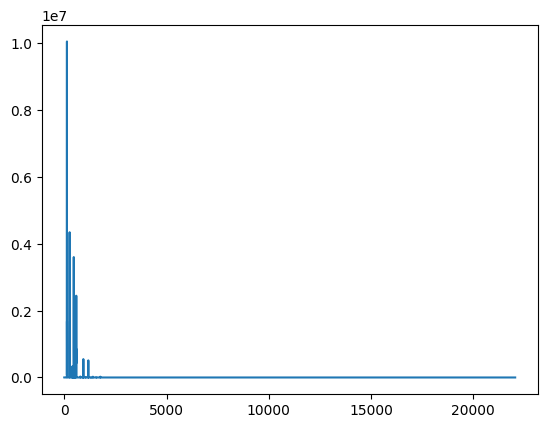

In [3]:
spectrum = segment.make_spectrum()
spectrum.plot_power()

잘 안보여서 log scale로 다시 plot 해봅시다.

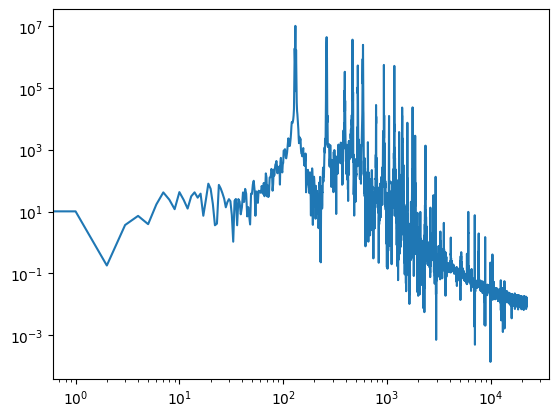

In [4]:
spectrum.plot_power()
thinkplot.config(xscale='log', yscale='log')

위의 주파수 신호로 부터 크게 3개의 골짜기를 찾았어요.
해당 골짜기들을 기준으로 화음을 구성하는 음들이 나뉜다고 보면 되겠죠? 표기해봅시다.

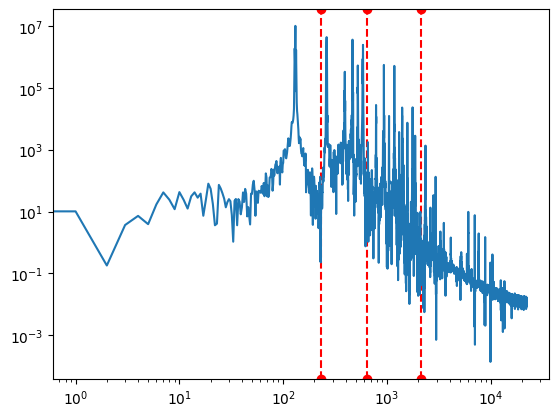

In [5]:
VALLEY_HZ = [
    230,
    640,
    2126,
]

for x in VALLEY_HZ:
    plt.axvline(x, marker='o', color='red', linestyle='--')
spectrum.plot_power()
thinkplot.config(xscale='log', yscale='log')

그럼 이제 HPF(High-pass-filter), LPF(Low-pass-filter) 를 이용해서 각 구간을 하나 씩 쪼개보고, 화음이 분리되는지 봅시다.

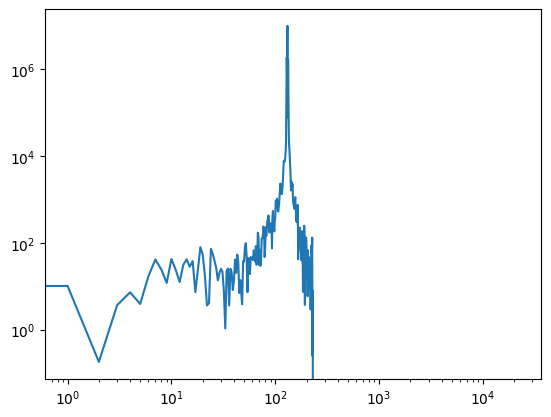

In [6]:
spectrum_1 = spectrum.copy()
spectrum_1.low_pass(cutoff=VALLEY_HZ[0])
spectrum_1.plot_power()
thinkplot.config(xscale='log', yscale='log')

In [7]:
spectrum_1.make_wave().make_audio()

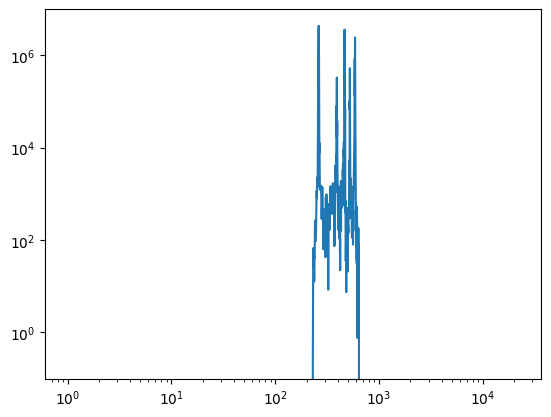

In [8]:
spectrum_2 = spectrum.copy()
spectrum_2.high_pass(cutoff=VALLEY_HZ[0])
spectrum_2.low_pass(cutoff=VALLEY_HZ[1])
spectrum_2.plot_power()
thinkplot.config(xscale='log', yscale='log')

In [9]:
spectrum_2.make_wave().make_audio()

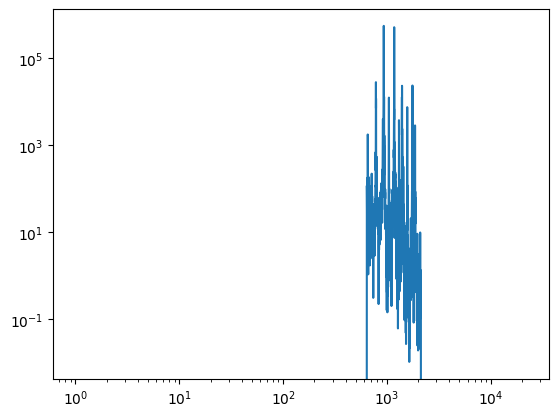

In [10]:
spectrum_3 = spectrum.copy()
spectrum_3.high_pass(cutoff=VALLEY_HZ[1])
spectrum_3.low_pass(cutoff=VALLEY_HZ[2])
spectrum_3.plot_power()
thinkplot.config(xscale='log', yscale='log')

In [11]:
spectrum_3.make_wave().make_audio()

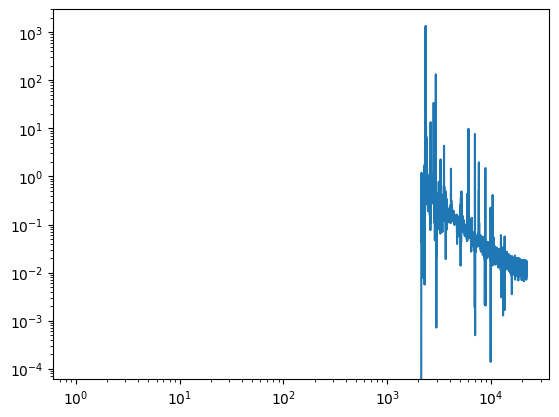

In [12]:
spectrum_4 = spectrum.copy()
spectrum_4.high_pass(cutoff=VALLEY_HZ[2])
spectrum_4.plot_power()
thinkplot.config(xscale='log', yscale='log')

In [13]:
spectrum_4.make_wave().make_audio()